In [47]:
import pandas as pd
crime_data = pd.read_csv("C:/Users/rlawl/Downloads/경찰청_범죄자 범행 시 연령,성별,정신상태_20181231.csv",encoding='CP949')

In [48]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구분         5 non-null      object
 1   남자정상       5 non-null      int64 
 2   남자정신이상     5 non-null      int64 
 3   남자정신박약     5 non-null      int64 
 4   남자기타정신장애   5 non-null      int64 
 5   남자주취       5 non-null      int64 
 6   남자미상       5 non-null      int64 
 7   여자정상       5 non-null      int64 
 8   여자정신이상     5 non-null      int64 
 9   여자정신박약     5 non-null      int64 
 10  여자기타정신장애   5 non-null      int64 
 11  여자주취       5 non-null      int64 
 12  여자월경시이상    5 non-null      int64 
 13  여자미상       5 non-null      int64 
dtypes: int64(13), object(1)
memory usage: 688.0+ bytes


In [49]:
crime_data

,구분,남자정상,남자정신이상,남자정신박약,남자기타정신장애,남자주취,남자미상,여자정상,여자정신이상,여자정신박약,여자기타정신장애,여자주취,여자월경시이상,여자미상
0,강력범죄,11712,148,162,262,9111,5719,537,37,3,27,260,0,324
1,절도범죄,57610,211,336,682,7422,6973,19596,186,109,418,1064,109,2618
2,폭력범죄,97722,607,185,783,90292,100213,24757,346,61,346,11584,1,22072
3,지능범죄,106312,75,74,162,8308,109245,32698,42,22,79,498,1,34598
4,기타범죄,290748,427,191,743,175500,176063,88437,209,53,258,21045,3,61526


In [50]:
cols = list(crime_data.columns)
cols = [i.strip() for i in cols]
cols


['구분',
 '남자정상',
 '남자정신이상',
 '남자정신박약',
 '남자기타정신장애',
 '남자주취',
 '남자미상',
 '여자정상',
 '여자정신이상',
 '여자정신박약',
 '여자기타정신장애',
 '여자주취',
 '여자월경시이상',
 '여자미상']

In [51]:
crime_data.columns = cols

In [52]:
crime_data.set_index('구분',inplace =True)

In [53]:
crime_data['남자전체'] = crime_data['남자정상']+crime_data['남자정신이상']+crime_data['남자정신박약']+crime_data['남자기타정신장애']+crime_data['남자주취']+crime_data['남자미상']

crime_data['여자전체'] =  crime_data['여자정상']+crime_data['여자정신이상']+crime_data['여자정신박약']+crime_data['여자기타정신장애']+crime_data['여자주취']+crime_data['여자미상']+crime_data['여자월경시이상']

crime_data

,남자정상,남자정신이상,남자정신박약,남자기타정신장애,남자주취,남자미상,여자정상,여자정신이상,여자정신박약,여자기타정신장애,여자주취,여자월경시이상,여자미상,남자전체,여자전체
구분,,,,,,,,,,,,,,,
강력범죄,11712,148,162,262,9111,5719,537,37,3,27,260,0,324,27114,1188
절도범죄,57610,211,336,682,7422,6973,19596,186,109,418,1064,109,2618,73234,24100
폭력범죄,97722,607,185,783,90292,100213,24757,346,61,346,11584,1,22072,289802,59167
지능범죄,106312,75,74,162,8308,109245,32698,42,22,79,498,1,34598,224176,67938
기타범죄,290748,427,191,743,175500,176063,88437,209,53,258,21045,3,61526,643672,171531


In [54]:
cd = crime_data[['남자전체','여자전체','남자정상','여자정상']]
cd.drop(index = '기타범죄 ',inplace =True)

C:\Users\rlawl\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 맑은 고딕 한글 설정
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결
cd

,남자전체,여자전체,남자정상,여자정상
구분,,,,
강력범죄,27114,1188,11712,537
절도범죄,73234,24100,57610,19596
폭력범죄,289802,59167,97722,24757
지능범죄,224176,67938,106312,32698


In [56]:

cd['남자정상확률'] = (cd['남자정상']/cd['남자전체']*100)
cd['여자정상확률'] = (cd['여자정상']/cd['여자전체']*100)

<ipython-input-56-476d22d8eca3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['남자정상확률'] = (cd['남자정상']/cd['남자전체']*100)
<ipython-input-56-476d22d8eca3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['여자정상확률'] = (cd['여자정상']/cd['여자전체']*100)


In [57]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 강력범죄  to 지능범죄 
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   남자전체    4 non-null      int64  
 1   여자전체    4 non-null      int64  
 2   남자정상    4 non-null      int64  
 3   여자정상    4 non-null      int64  
 4   남자정상확률  4 non-null      float64
 5   여자정상확률  4 non-null      float64
dtypes: float64(2), int64(4)
memory usage: 224.0+ bytes


In [61]:
cd['전체정상확률'] = (cd['남자정상']+cd['여자정상'])/(cd['남자전체']+cd['여자전체'])*100
cd

<ipython-input-61-fcf8a15a74a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd['전체정상확률'] = (cd['남자정상']+cd['여자정상'])/(cd['남자전체']+cd['여자전체'])*100


,남자전체,여자전체,남자정상,여자정상,남자정상확률,여자정상확률,전체정상확률
구분,,,,,,,
강력범죄,27114,1188,11712,537,43.195397,45.202020,43.279627
절도범죄,73234,24100,57610,19596,78.665647,81.311203,79.320690
폭력범죄,289802,59167,97722,24757,33.720264,41.842581,35.097387
지능범죄,224176,67938,106312,32698,47.423453,48.129177,47.587586


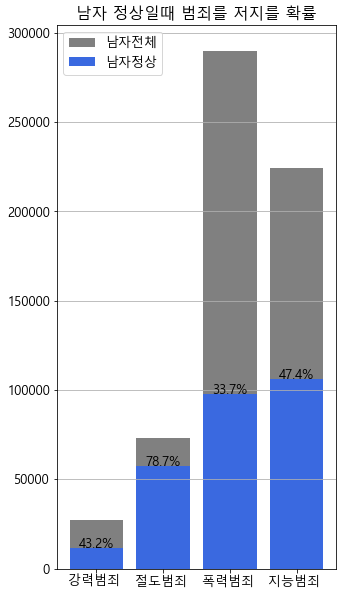

In [43]:

plt.figure(figsize= (5,10))
plt.title('남자 정상일때 범죄를 저지를 확률')
plt.bar(cd.index,cd['남자전체'],label = '남자전체',color = 'gray')
bar = plt.bar(cd.index,cd['남자정상'],label = '남자정상',color= '#3a69e0')

for idx, rect in enumerate(bar):
    plt.text(idx,rect.get_height()+3,cd['남자정상확률'][idx],ha ='center')
    
plt.legend()
plt.grid(axis ='y')

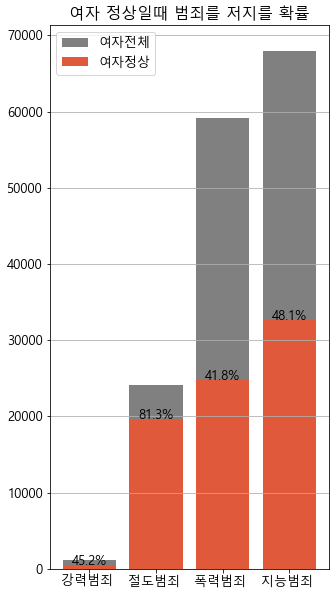

In [44]:
plt.figure(figsize= (5,10))
plt.title('여자 정상일때 범죄를 저지를 확률')
plt.bar(cd.index,cd['여자전체'],label = '여자전체',color ='gray')
bar = plt.bar(cd.index,cd['여자정상'],label = '여자정상',color ='#e0593a')

for idx, rect in enumerate(bar):
    plt.text(idx,rect.get_height()+0.5,cd['여자정상확률'][idx],ha ='center')
    
    
plt.legend()
plt.grid(axis='y')

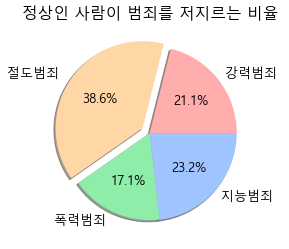

In [80]:
plt.title('정상인 사람이 범죄를 저지르는 비율')

plt.pie(cd['전체정상확률'],labels = cd.index,autopct = '%.1f%%',explode = [0,0.1,0,0],colors = ['#ffadad','#ffd6a5', '#8eeda8','#a0c4ff'],shadow =True)
plt.show()


In [96]:
df= pd.read_csv("C:/Users/rlawl/Downloads/(주)강원랜드_입장객 현황_20211231.csv",encoding='CP949')
df

,연도,1분기,2분기,3분기,4분기
0,2021년,87217,199394,254188,303341
1,2020년,434295,2364,40074,122532
2,2019년,745566,668687,784817,696121
3,2018년,730149,663382,777621,680737
4,2017년,794729,725580,814335,780304
5,2016년,817060,731734,867230,753632
6,2015년,800923,723178,851539,757751
7,2014년,745389,695210,832842,733459
8,2013년,775697,707196,864118,720981
9,2012년,794782,690121,810384,729223


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      10 non-null     object
 1   1분기     10 non-null     int64 
 2   2분기     10 non-null     int64 
 3   3분기     10 non-null     int64 
 4   4분기     10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 528.0+ bytes


In [97]:
df.set_index('연도',inplace = True)

In [100]:
df.sort_index(inplace= True)
df['총 인원'] = df['1분기']+df['2분기']+df['3분기']+ df['4분기']

In [101]:
df

,1분기,2분기,3분기,4분기,총 인원
연도,,,,,
2012년,794782,690121,810384,729223,3024510
2013년,775697,707196,864118,720981,3067992
2014년,745389,695210,832842,733459,3006900
2015년,800923,723178,851539,757751,3133391
2016년,817060,731734,867230,753632,3169656
2017년,794729,725580,814335,780304,3114948
2018년,730149,663382,777621,680737,2851889
2019년,745566,668687,784817,696121,2895191
2020년,434295,2364,40074,122532,599265


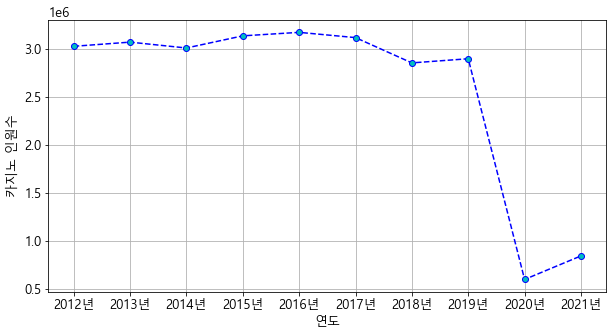

In [121]:
plt.figure(figsize = (10,5))
plt.plot(df.index,df['총 인원'],marker = 'o', linestyle = '--',color = 'b',mfc ='c')
plt.xlabel('연도')
plt.ylabel('카지노 인원수')
plt.grid()

In [125]:
df = pd.read_csv("C:/Users/rlawl/Downloads/한국전력거래소_시간별 전력수요량_20211231.csv",encoding='CP949')

In [126]:
df.set_index('날짜')

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
날짜,,,,,,,,,,,,,,,,,,,,,
2021-01-01,64942,62593,60905,59889,59638,59936,60193,59982,59626,57904,...,56691,58299,60425,62931,64176,63645,62754,61561,61979,63055
2021-01-02,60658,58603,57309,56663,56733,57327,58378,59285,60669,59515,...,55493,57865,61407,64223,65082,64257,62981,61686,61962,64227
2021-01-03,61992,59723,58310,57599,57518,58073,58877,59373,59434,56835,...,59465,61355,63202,65426,66473,65646,64815,63289,63706,64480
2021-01-04,62078,60011,58936,58715,59233,61081,64908,71659,80766,82796,...,81315,81431,82840,81666,78838,75717,72867,69726,68460,70327
2021-01-05,67267,64957,63471,63136,63564,65045,68221,73685,81609,83240,...,81611,82647,84497,83721,81513,78460,75423,72053,70992,72838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,66465,64473,63140,62540,63122,65025,69117,76487,86054,87590,...,88435,89654,90708,88653,85067,81527,78245,74696,73048,74217
2021-12-28,71059,68940,67701,67076,67184,68598,72033,78270,86809,88717,...,87226,87627,88077,85978,83052,80011,77035,73589,71856,72875
2021-12-29,69651,67276,65941,65136,65534,66910,70309,75972,84106,85966,...,82446,82500,83608,82009,79711,77646,75511,72342,70829,71882


In [129]:
dsc = df.describe()

In [130]:
dsc

,1시,2시,3시,4시,5시,6시,7시,8시,9시,10시,...,15시,16시,17시,18시,19시,20시,21시,22시,23시,24시
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,59474.797260,57329.791781,56135.912329,55614.435616,55880.698630,56997.457534,59288.523288,62379.487671,66197.038356,66787.780822,...,66633.569863,67687.975342,69304.767123,69692.643836,69767.673973,69215.060274,67728.030137,65563.463014,63563.591781,62972.369863
std,5076.825194,4947.050927,4831.958286,4760.624479,4779.037648,4923.920976,5534.842947,7134.965049,9606.642189,10473.001592,...,10672.675088,10363.445426,10046.144681,9087.195015,7914.829493,7136.110062,6453.884842,5560.076020,4889.582544,5210.746677
min,47019.000000,45237.000000,44190.000000,43669.000000,43678.000000,44383.000000,45080.000000,45564.000000,44470.000000,43311.000000,...,40254.000000,42320.000000,45879.000000,49395.000000,52477.000000,53075.000000,53255.000000,52494.000000,51044.000000,49540.000000
25%,56235.000000,54174.000000,53200.000000,52723.000000,52702.000000,53408.000000,55505.000000,57685.000000,59626.000000,60195.000000,...,59350.000000,60527.000000,62533.000000,63946.000000,64834.000000,65062.000000,63946.000000,62353.000000,60829.000000,59816.000000
50%,58562.000000,56565.000000,55446.000000,54992.000000,55339.000000,56611.000000,58983.000000,62175.000000,66019.000000,66226.000000,...,66616.000000,67663.000000,69016.000000,69252.000000,69488.000000,68551.000000,67037.000000,65034.000000,63058.000000,62179.000000
75%,63116.000000,60763.000000,59382.000000,58862.000000,59136.000000,60172.000000,62965.000000,67365.000000,73253.000000,75224.000000,...,74602.000000,75553.000000,76725.000000,75737.000000,75068.000000,73747.000000,71616.000000,69024.000000,66954.000000,66782.000000
max,73086.000000,70960.000000,69867.000000,69143.000000,69141.000000,70433.000000,73185.000000,78406.000000,86809.000000,89506.000000,...,89758.000000,89654.000000,90708.000000,91141.000000,90223.000000,88949.000000,86014.000000,81286.000000,75738.000000,75614.000000


In [140]:
dsc = dsc.transpose()
dsc.index

Index(['1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시',
       '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시',
       '22시', '23시', '24시'],
      dtype='object')

In [138]:
dsc.info()

dsc.columns

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1시 to 24시
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.3+ KB


Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

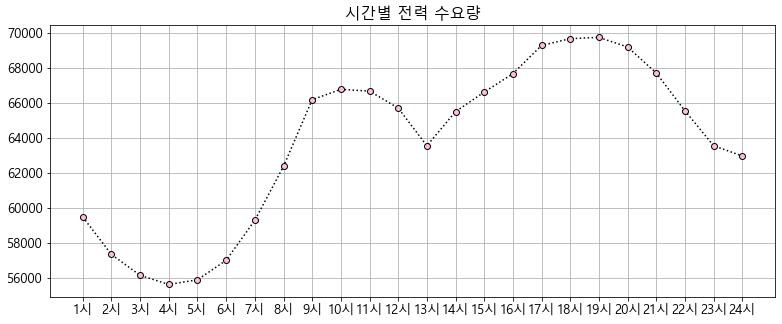

In [158]:
plt.figure(figsize=(13,5))
plt.title('시간별 전력 수요량')
plt.plot(dsc.index,dsc['mean'],marker = 'o',linestyle = ':',mfc = 'pink',color ='black')
plt.grid ()

In [1]:
import pandas as pd
df = pd.read_csv("C:/Users/rlawl/Downloads/서울시 월별 평균 대기오염도 정보.csv",encoding='CP949')

In [3]:
df.dropna()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202209,강남구,0.017,0.031,0.3,0.003,19.0,9.0
1,202209,강남대로,0.025,0.019,0.5,0.003,18.0,9.0
2,202209,강동구,0.011,0.025,0.3,0.002,18.0,9.0
3,202209,강변북로,0.019,0.024,0.4,0.002,16.0,7.0
4,202209,강북구,0.007,0.031,0.3,0.002,19.0,8.0
...,...,...,...,...,...,...,...,...
5502,201202,도산대로,0.032,0.012,0.7,0.006,57.0,26.0
5520,201202,종로구,0.032,0.016,0.5,0.008,53.0,24.0
5534,201201,강서구,0.041,0.010,0.8,0.008,66.0,38.0
5537,201201,광진구,0.030,0.011,0.8,0.008,62.0,39.0


In [17]:
df = df.drop(['측정월','측정소명'],axis=1)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

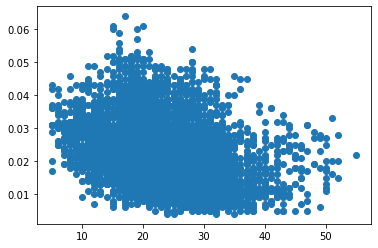

In [22]:
plt.scatter(df['초미세먼지(㎍/㎥)'],df['오존농도(ppm)'])

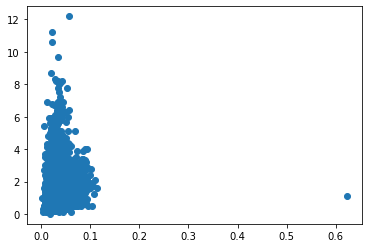

In [7]:
plt.scatter(df['이산화질소농도(ppm)'],df['일산화탄소농도(ppm)'])

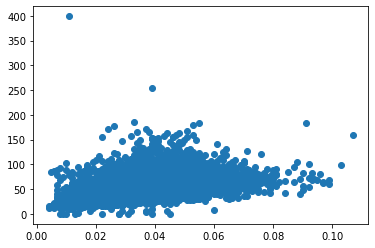

In [10]:
plt.scatter(df['이산화질소농도(ppm)'],df['미세먼지(㎍/㎥)'])

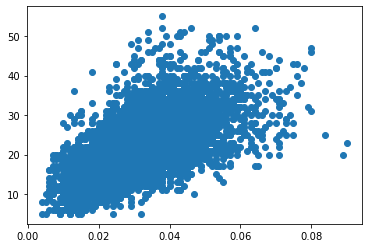

In [11]:
plt.scatter(df['이산화질소농도(ppm)'],df['초미세먼지(㎍/㎥)'])

In [12]:
import seaborn as sns

C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from c

C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 45453 missing from current fon

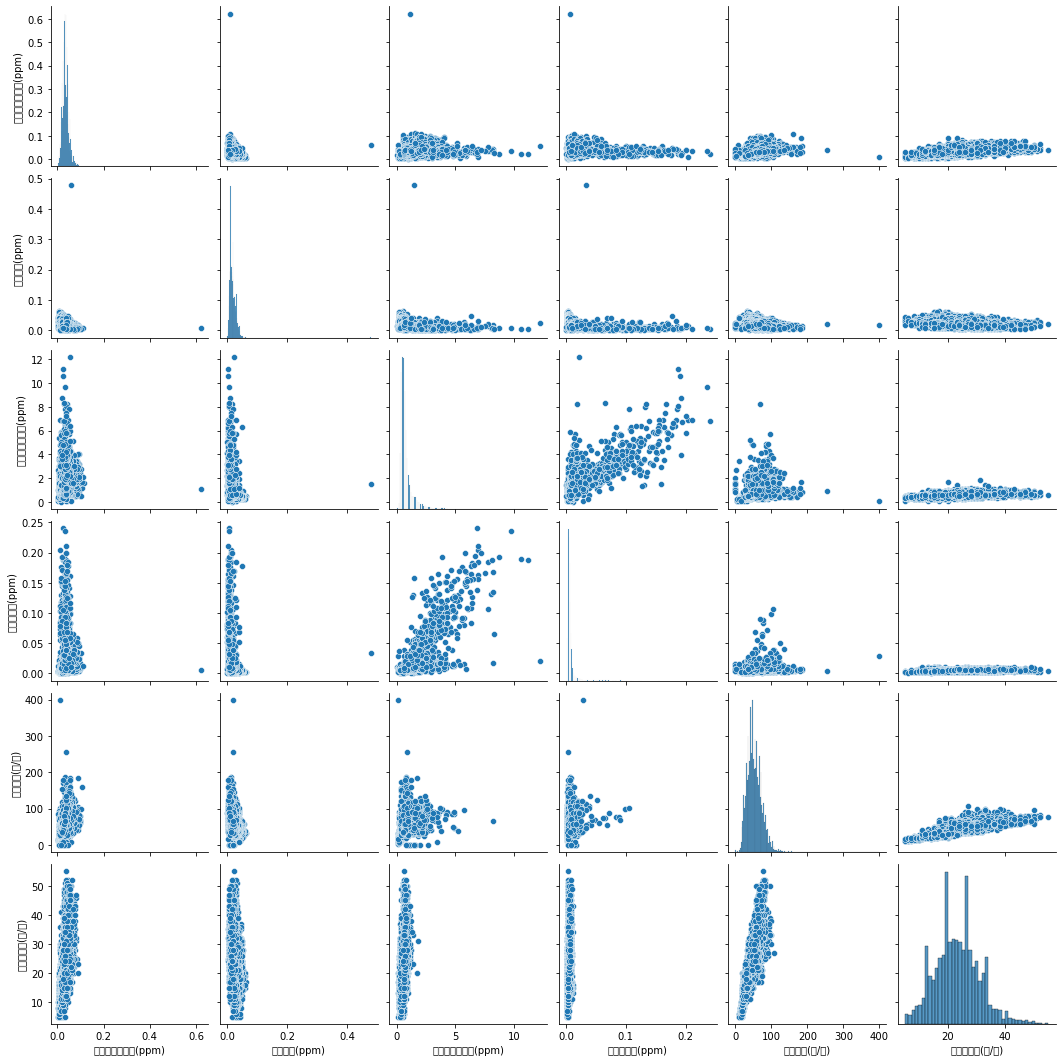

In [18]:
sns.pairplot(df)

C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from c

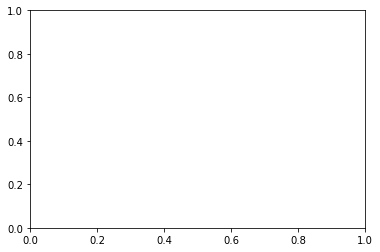

C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51656 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\rlawl\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from c

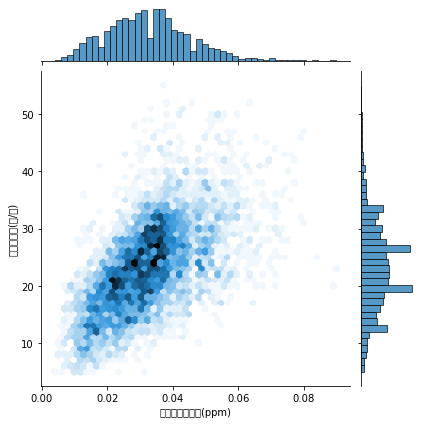

In [27]:

hexbin = sns.jointplot(x= df['이산화질소농도(ppm)'],y = df['초미세먼지(㎍/㎥)'], kind ="hex")

Text(0, 0.5, '초미세먼지(㎍/㎥)')

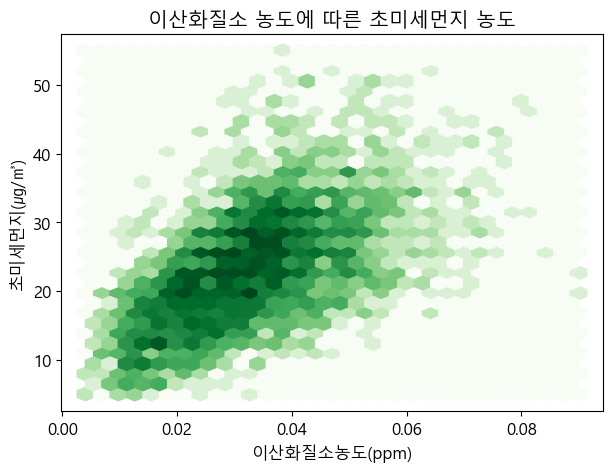

In [46]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 맑은 고딕 한글 설정
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시, 마이너스 글자가 깨지는 현상을 해결

plt.figure(figsize = (7,5),dpi=100)
plt.title('이산화질소 농도에 따른 초미세먼지 농도')
plt.hexbin(df['이산화질소농도(ppm)'], df['초미세먼지(㎍/㎥)'], gridsize=30, bins='log', cmap='Greens')
plt.xlabel('이산화질소농도(ppm)')
plt.ylabel('초미세먼지(㎍/㎥)')